In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [21]:
file_path_train = './CSV_ALFREDO/final_data_test.csv'

with open(file_path_train, 'r') as f:
    data = pd.read_csv(f, sep=';', encoding='utf-8')

display(data)

,Â¿Considera que las medidas que se han llevado a cabo para prevenir la evoluciÃ³n de la pandemia son adecuadas y justas?,La idea de que otra persona pueda controlar sus pensamientos,Creer que la mayorÃ­a de sus problemas son culpa de los demÃ¡s,Sentir miedo en los espacios abiertos o en la calle,OÃ­r voces que otras personas no oyen,La idea de que uno no se puede fiar de la mayorÃ­a de las personas,Tener miedo de repente y sin razÃ³n,Arrebatos de cÃ³lera o ataques de furia que no logra controlar,Miedo a salir de casa solo/a,Sentirse solo/a,...,Tener ganas de romper algo,Sentirse muy cohibido/a entre otras personas,"Sentir miedo o ansiedad entre mucha gente (en el cine, supermercado, etc.)",Ataques de terror o pÃ¡nico,Tener discusiones frecuentes,El que otros no le reconozcan adecuadamente sus logros,Sentirse inquieto/a o intranquilo/a,La sensaciÃ³n de ser un/a inÃºtil o no valer nada,Gritar o tirar cosas,La impresiÃ³n de que la gente intentarÃ­a aprovecharse de usted si los dejara
0,3.0,0,0,2,0,0,0,1,0,2.0,...,2,0.0,1,1.0,1,0,2,1.0,0.0,0
1,3.0,0,0,0,0,4,0,0,0,0.0,...,0,0.0,0,0.0,0,4,0,0.0,0.0,4
2,4.0,0,0,1,0,0,0,0,0,0.0,...,0,0.0,0,0.0,1,0,0,0.0,0.0,0
3,4.0,0,0,1,0,1,1,2,0,2.0,...,0,0.0,0,0.0,0,0,3,0.0,0.0,0
4,3.0,0,0,1,0,0,1,0,0,0.0,...,0,0.0,1,0.0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,5.0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0.0,0
977,4.0,0,0,1,0,0,0,0,0,0.0,...,0,0.0,1,0.0,0,0,0,0.0,0.0,0
978,4.0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,1,0,1,0.0,0.0,0
979,1.0,0,2,2,0,0,4,3,1,4.0,...,1,4.0,0,0.0,2,1,4,3.0,0.0,0


In [22]:
import pandas as pd

# Supongamos que 'data' ya está definido como tu DataFrame

groups = {
    'Hostilidad': [6, 33, 34, 38, 42],
    'Somatización': [17, 22, 25, 28, 30],
    'Depresión': [8, 9, 10, 26, 41],
    'Obsesión-compulsión': [15, 19, 20, 24, 27],
    'Ansiedad': [5, 11, 29, 37, 40],
    'Sensibilidad interpersonal': [13, 14, 16, 31, 35],
    'Agorafobia': [2, 7, 21, 23, 36],
    'Ideación paranoide': [1, 4, 18, 39, 43],
    'Psicoticismo': [0, 3, 12, 32, 44]
}

# Convertir las columnas de preguntas a numéricas, si es necesario
for group_name, questions in groups.items():
    data.iloc[:, questions] = data.iloc[:, questions].apply(pd.to_numeric, errors='coerce')
    data[group_name] = data.iloc[:, questions].sum(axis=1)

# Calcular índices globales
data['GSI'] = data.iloc[:, :45].mean(axis=1)  # Global Severity Index
data['PSDI'] = data.iloc[:, :45].apply(lambda x: x[x > 1].mean(), axis=1)  # Positive Symptom Distress Index
data['PST'] = data.iloc[:, :45].apply(lambda x: (x > 1).sum(), axis=1)  # Positive Symptom Total

# Verificar el resultado
print(data.head())


   Â¿Considera que las medidas que se han llevado a cabo para prevenir la evoluciÃ³n de la pandemia son adecuadas y justas?  \
0                                                3.0                                                                          
1                                                3.0                                                                          
2                                                4.0                                                                          
3                                                4.0                                                                          
4                                                3.0                                                                          

   La idea de que otra persona pueda controlar sus pensamientos   \
0                                                  0               
1                                                  0               
2                                

In [23]:
display(data)

,Â¿Considera que las medidas que se han llevado a cabo para prevenir la evoluciÃ³n de la pandemia son adecuadas y justas?,La idea de que otra persona pueda controlar sus pensamientos,Creer que la mayorÃ­a de sus problemas son culpa de los demÃ¡s,Sentir miedo en los espacios abiertos o en la calle,OÃ­r voces que otras personas no oyen,La idea de que uno no se puede fiar de la mayorÃ­a de las personas,Tener miedo de repente y sin razÃ³n,Arrebatos de cÃ³lera o ataques de furia que no logra controlar,Miedo a salir de casa solo/a,Sentirse solo/a,...,Depresión,Obsesión-compulsión,Ansiedad,Sensibilidad interpersonal,Agorafobia,Ideación paranoide,Psicoticismo,GSI,PSDI,PST
0,3.0,0,0,2,0,0,0,1,0,2.0,...,9.0,4.0,3,4.0,1.0,3.0,8.0,0.955556,2.357143,14
1,3.0,0,0,0,0,4,0,0,0,0.0,...,1.0,4.0,11,9.0,1.0,2.0,8.0,0.888889,3.200000,10
2,4.0,0,0,1,0,0,0,0,0,0.0,...,0.0,1.0,0,0.0,0.0,1.0,7.0,0.266667,2.666667,3
3,4.0,0,0,1,0,1,1,2,0,2.0,...,7.0,1.0,2,0.0,2.0,0.0,8.0,0.666667,2.875000,8
4,3.0,0,0,1,0,0,1,0,0,0.0,...,1.0,1.0,2,0.0,1.0,1.0,4.0,0.311111,2.500000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,5.0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,5.0,0.155556,3.500000,2
977,4.0,0,0,1,0,0,0,0,0,0.0,...,0.0,0.0,2,0.0,1.0,1.0,5.0,0.200000,4.000000,1
978,4.0,0,0,0,0,0,0,0,0,0.0,...,3.0,1.0,0,0.0,0.0,2.0,5.0,0.333333,3.000000,3
979,1.0,0,2,2,0,0,4,3,1,4.0,...,13.0,9.0,9,5.0,16.0,2.0,10.0,1.888889,3.347826,23


In [24]:
print(np.max(data['GSI']), np.min(data['GSI']), np.mean(data['GSI']), np.std(data['GSI']))

print(np.sum(data['GSI']>= np.mean(data['GSI']+ np.std(data['GSI']))))
print(np.sum(data['GSI']>= np.mean(data['GSI']- np.std(data['GSI']))))


3.6444444444444444 0.06666666666666667 1.147491222108959 0.7052206799196673
168
834


In [25]:
# Calcular la media y la desviación estándar para cada grupo de síntomas
elevated_thresholds = {}
very_high_thresholds = {}
for group_name, questions in groups.items():
    mean_score = data[group_name].mean()
    std_score = data[group_name].std()
    elevated_threshold = mean_score + std_score
    very_high_threshold = mean_score + 1.5 * std_score

    # Guardar el umbral en un diccionario
    elevated_thresholds[group_name] = elevated_threshold
    very_high_thresholds[group_name] = very_high_threshold

# Contar cuántos individuos están por encima de los umbrales
above_elevated_count = {}
above_very_high_count = {}

for group_name in groups.keys():
    elevated_threshold = elevated_thresholds[group_name]
    very_high_threshold =  very_high_thresholds[group_name]

    above_elevated_count[group_name] = (data[group_name] > elevated_threshold).sum()
    above_very_high_count[group_name] = (data[group_name] > very_high_threshold).sum()


# Mostrar las cuentas
print("Número de individuos por encima del umbral elevado para cada grupo:", above_elevated_count)
print("Número de individuos por encima del umbral muy alto para cada grupo:", above_very_high_count)



Número de individuos por encima del umbral elevado para cada grupo: {'Hostilidad': 146, 'Somatización': 158, 'Depresión': 158, 'Obsesión-compulsión': 167, 'Ansiedad': 169, 'Sensibilidad interpersonal': 169, 'Agorafobia': 124, 'Ideación paranoide': 130, 'Psicoticismo': 140}
Número de individuos por encima del umbral muy alto para cada grupo: {'Hostilidad': 90, 'Somatización': 91, 'Depresión': 89, 'Obsesión-compulsión': 104, 'Ansiedad': 95, 'Sensibilidad interpersonal': 92, 'Agorafobia': 100, 'Ideación paranoide': 97, 'Psicoticismo': 97}


In [26]:
# Crear un nuevo DataFrame para los resultados
result = pd.DataFrame(index=data.index)

# Llenar el nuevo DataFrame con 1 y 0 según el umbral elevado
for group_name, threshold in elevated_thresholds.items():
    result[group_name] = (data[group_name] > threshold).astype(int)



In [27]:
display(result)

,Hostilidad,Somatización,Depresión,Obsesión-compulsión,Ansiedad,Sensibilidad interpersonal,Agorafobia,Ideación paranoide,Psicoticismo
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
976,0,0,0,0,0,0,0,0,0
977,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0
979,0,1,1,0,0,0,1,0,0


In [28]:
ones_count = result.apply(lambda col: (col == 1).sum())

# Contar las filas donde todas las columnas son 0
zero_rows_count = (result == 0).all(axis=1).sum()

print("Cantidad de 1s en cada columna:")
print(ones_count)

print("\nCantidad de filas con todas las columnas en 0:")
print(zero_rows_count)



Cantidad de 1s en cada columna:
Hostilidad                    146
Somatización                  158
Depresión                     158
Obsesión-compulsión           167
Ansiedad                      169
Sensibilidad interpersonal    169
Agorafobia                    124
Ideación paranoide            130
Psicoticismo                  140
dtype: int64

Cantidad de filas con todas las columnas en 0:
620


In [29]:
row_sums = result.sum(axis=1)

# Contar cuántas filas tienen una suma mayor que 1
rows_with_more_than_one_one = (row_sums > 1).sum()

print("Cantidad de filas con más de una columna con el valor 1:")
print(rows_with_more_than_one_one)

Cantidad de filas con más de una columna con el valor 1:
257


In [30]:
import pandas as pd

# Supongamos que 'results' es tu DataFrame
# results = pd.DataFrame(...) # tu DataFrame aquí

# Inicializar un diccionario para almacenar las combinaciones
combinations = {}

# Iterar sobre las filas del DataFrame
for idx, row in result.iterrows():
    # Obtener las columnas que tienen el valor 1 en esta fila
    columns_with_ones = row.index[row == 1].tolist()

    if len(columns_with_ones) > 1:
        # Convertir la lista de columnas en una tupla (para ser hashable y usar como clave)
        columns_tuple = tuple(columns_with_ones)

        # Agregar las columnas al diccionario de combinaciones
        if columns_tuple in combinations:
            combinations[columns_tuple].append(idx)
        else:
            combinations[columns_tuple] = [idx]

# Filtrar combinaciones que tienen más de una fila
combinations = {key: value for key, value in combinations.items() if len(value) > 1}

# Imprimir las combinaciones encontradas
print("Combinaciones de columnas que contienen 1 en cada fila donde aparecen:")
for columns, rows in combinations.items():
  if len(rows)>5:
    print(f"Columnas: {columns} - Filas: {len(rows)}")

print(len(combinations))


Combinaciones de columnas que contienen 1 en cada fila donde aparecen:
Columnas: ('Hostilidad', 'Somatización', 'Depresión', 'Obsesión-compulsión', 'Ansiedad', 'Sensibilidad interpersonal', 'Psicoticismo') - Filas: 7
Columnas: ('Hostilidad', 'Somatización', 'Depresión', 'Obsesión-compulsión', 'Ansiedad', 'Sensibilidad interpersonal', 'Agorafobia', 'Ideación paranoide', 'Psicoticismo') - Filas: 29
Columnas: ('Somatización', 'Depresión') - Filas: 7
43


In [33]:
result.to_csv('./CSV_ALFREDO/result.csv', index=False, sep=';')

#Clustering


In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [19]:
X = data.iloc[:, :-12]
display(X)

,Â¿Considera que las medidas que se han llevado a cabo para prevenir la evoluciÃ³n de la pandemia son adecuadas y justas?,La idea de que otra persona pueda controlar sus pensamientos,Creer que la mayorÃ­a de sus problemas son culpa de los demÃ¡s,Sentir miedo en los espacios abiertos o en la calle,OÃ­r voces que otras personas no oyen,La idea de que uno no se puede fiar de la mayorÃ­a de las personas,Tener miedo de repente y sin razÃ³n,Arrebatos de cÃ³lera o ataques de furia que no logra controlar,Miedo a salir de casa solo/a,Sentirse solo/a,...,Tener ganas de romper algo,Sentirse muy cohibido/a entre otras personas,"Sentir miedo o ansiedad entre mucha gente (en el cine, supermercado, etc.)",Ataques de terror o pÃ¡nico,Tener discusiones frecuentes,El que otros no le reconozcan adecuadamente sus logros,Sentirse inquieto/a o intranquilo/a,La sensaciÃ³n de ser un/a inÃºtil o no valer nada,Gritar o tirar cosas,La impresiÃ³n de que la gente intentarÃ­a aprovecharse de usted si los dejara
0,3.0,0,0,2,0,0,0,1,0,2.0,...,2,0.0,1,1.0,1,0,2,1.0,0.0,0
1,3.0,0,0,0,0,4,0,0,0,0.0,...,0,0.0,0,0.0,0,4,0,0.0,0.0,4
2,4.0,0,0,1,0,0,0,0,0,0.0,...,0,0.0,0,0.0,1,0,0,0.0,0.0,0
3,4.0,0,0,1,0,1,1,2,0,2.0,...,0,0.0,0,0.0,0,0,3,0.0,0.0,0
4,3.0,0,0,1,0,0,1,0,0,0.0,...,0,0.0,1,0.0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,5.0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0.0,0
977,4.0,0,0,1,0,0,0,0,0,0.0,...,0,0.0,1,0.0,0,0,0,0.0,0.0,0
978,4.0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,1,0,1,0.0,0.0,0
979,1.0,0,2,2,0,0,4,3,1,4.0,...,1,4.0,0,0.0,2,1,4,3.0,0.0,0


C:\Users\Ceiec09\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Ceiec09\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Ceiec09\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


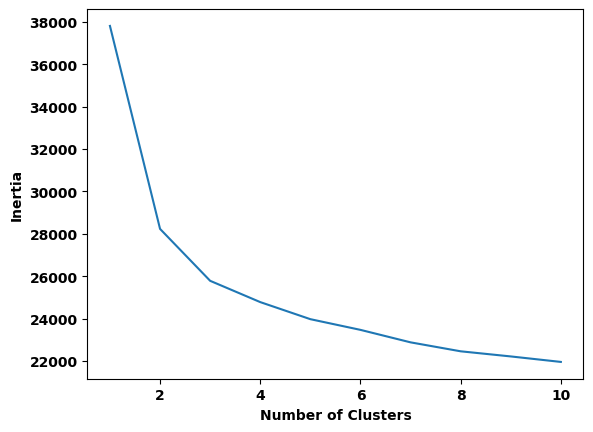

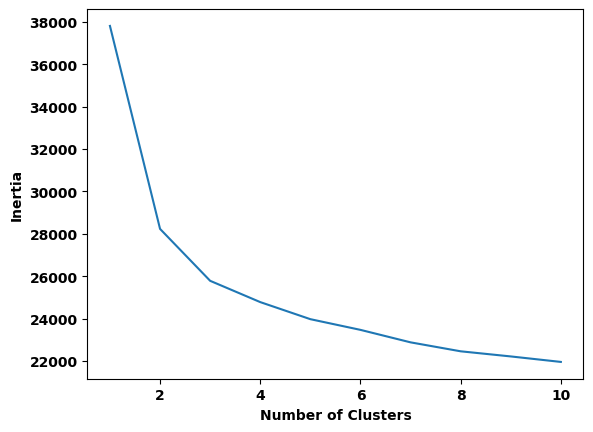

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que 'data' ya está definido como tu DataFrame

# Primero, asegúrate de que los datos están escalados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputar valores NaN con la media de cada columna
X_scaled = np.nan_to_num(X_scaled, nan=np.nanmean(X_scaled))

# Ahora puedes proceder con KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-4, random_state=4)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elegir el número de clusters
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clusters para cada punto de datos
clusters = kmeans.predict(X_scaled)

# Añadir las etiquetas de los clusters al DataFrame original
result['cluster'] = clusters

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# Eliminar filas con NaN en X
X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]

# Ahora puedes proceder con KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-4, random_state=4)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elegir el número de clusters
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
kmeans.fit(X_scaled)

# Predecir los clusters para cada punto de datos
clusters = kmeans.predict(X_scaled)

# Añadir las etiquetas de los clusters al DataFrame original
result['cluster'] = clusters

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


#SOM

In [18]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


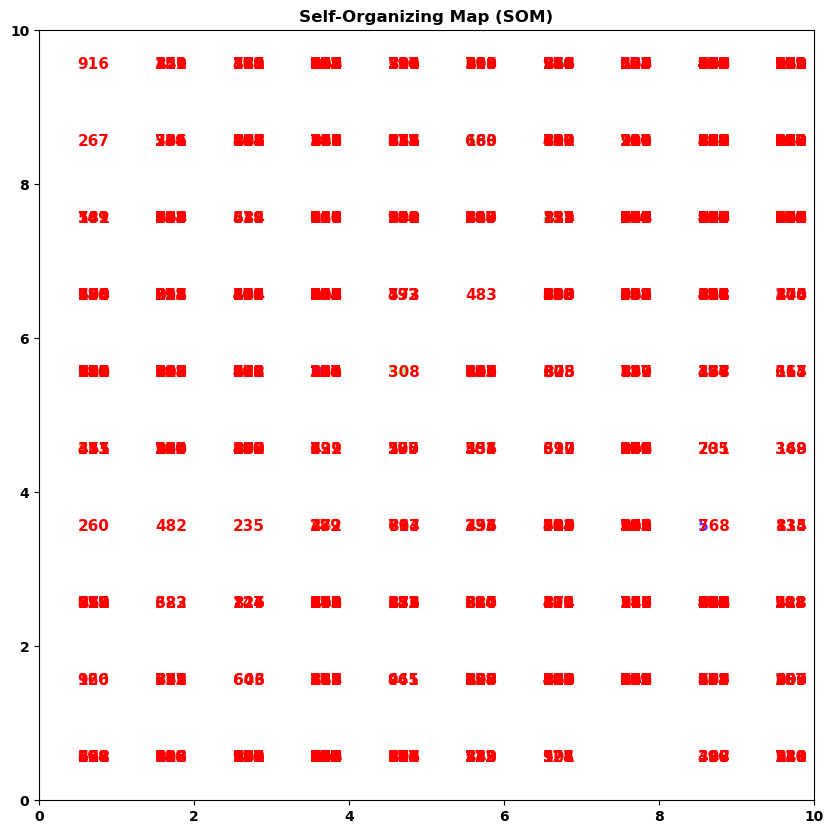

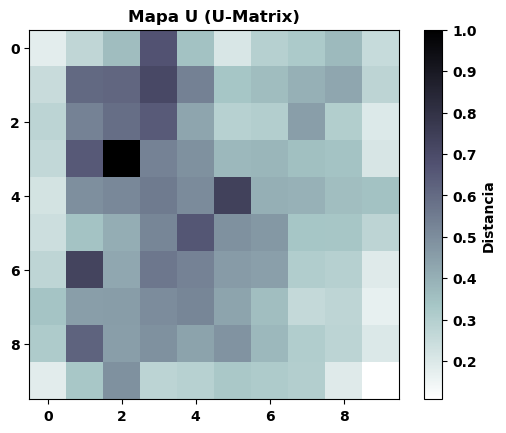

In [19]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

X = X_scaled

# Configurar el SOM
som_width = 10
som_height = 10
som = MiniSom(som_height, som_width, X.shape[1], sigma=1.0, learning_rate=0.5)

# Inicializar y entrenar el SOM
som.random_weights_init(X)
som.train_random(X, 100)

# Asignar etiquetas a los datos de X_train basados en las neuronas ganadoras (BMUs)
labels = np.array([som.winner(x) for x in X])
labels_tuples = [tuple(label) for label in labels]

# Convertir las etiquetas (BMUs) a una única etiqueta por clase
# Por ejemplo, podrías codificar las posiciones (i, j) de las neuronas ganadoras como una etiqueta única
unique_labels = {pos: idx for idx, pos in enumerate(set(labels_tuples))}
y_train = np.array([unique_labels[pos] for pos in labels_tuples])

# Visualizar el SOM
plt.figure(figsize=(10, 10))
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i),
             color=plt.cm.rainbow(i / 100.0), fontdict={'weight': 'bold', 'size': 11})

plt.xlim([0, som_width])
plt.ylim([0, som_height])
plt.title('Self-Organizing Map (SOM)')
plt.show()

# Calcular la U-Matrix
u_matrix = som.distance_map()

# Visualizar la U-Matrix
plt.imshow(u_matrix, cmap='bone_r')
plt.colorbar(label='Distancia')
plt.title('Mapa U (U-Matrix)')
plt.show()


In [22]:
display(y_train)

array([41, 54, 59, 87, 13, 76, 59, 29, 53, 88, 40, 60, 93, 60, 47, 45, 90,
       19, 13, 82,  5, 60, 58, 79, 71,  4, 77, 98, 41, 59, 97, 85, 49, 14,
       60, 28, 91, 13, 41, 14, 56,  6, 47, 35, 86, 37, 89, 79, 60,  5,  2,
        8, 16, 87, 81, 98, 54, 70, 79, 11, 58, 31, 38, 59, 63, 65, 59, 36,
       63, 42, 98, 33,  4, 42,  4,  4, 34, 48,  2, 37, 67, 90, 49, 39, 54,
        9, 34, 63, 86, 19, 16, 20, 73, 49, 79, 59, 56, 46,  5,  4, 37, 13,
       21,  0, 92, 56, 21, 38, 13, 20, 58, 86, 45, 98, 23, 19, 59, 30, 49,
        5, 53, 47, 69, 60,  7,  8, 71, 96, 69, 60, 60, 19, 93, 59, 41, 59,
       59, 49,  4,  5, 55, 15, 59, 16, 33, 93, 59, 28, 59, 83, 88, 10,  4,
       13, 13, 70,  6, 86, 39, 19, 84, 15, 95, 89, 56, 11,  2, 37, 40, 90,
       93, 53,  5, 47, 13, 96, 82,  0, 62,  5, 57, 44, 11, 45, 70, 59, 59,
        0, 67, 40, 36, 41, 11, 59, 79, 43, 47, 93, 48,  9, 98,  4, 70,  5,
       24, 22, 13, 59,  5, 59, 70, 77, 35, 63,  1, 62, 13,  5, 60, 93, 41,
       90, 79, 77, 42, 59

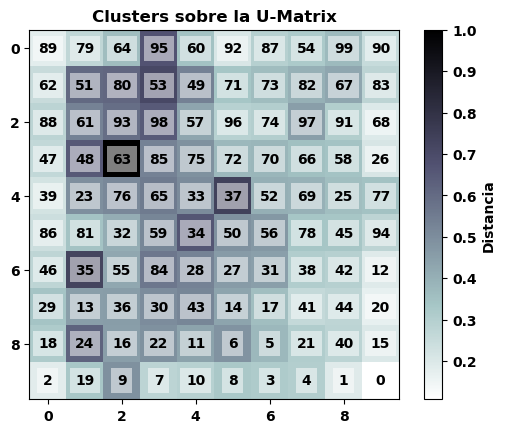

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Obtener los pesos de las neuronas (prototipos)
weights = som.get_weights().reshape(-1, X.shape[1])

# Aplicar clustering jerárquico a los pesos de las neuronas
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.3)
cluster_labels = clustering.fit_predict(weights)

# Visualizar los clusters en la U-Matrix
plt.imshow(u_matrix, cmap='bone_r')
plt.colorbar(label='Distancia')
for i, m in enumerate(som.get_weights()):
    for j, x in enumerate(m):
        plt.text(j, i, cluster_labels[i*som_width + j],
                 ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.title('Clusters sobre la U-Matrix')
plt.show()


In [1]:
!pip freeze

aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohappyeyeballs @ file:///C:/b/abs_b505trsapr/croot/aiohappyeyeballs_1725434036096/work
aiohttp @ file:///C:/b/abs_13j6efxjb7/croot/aiohttp_1725529348885/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/b/abs_45ba4vacaj/croot/alabaster_1718201502252/work
altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anaconda-anon-usage @ file:///C:/b/abs_c3w_h1zzjg/croot/anaconda-anon-usage_1710965204622/work
anaconda-catalogs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/anaconda-catalogs_1701816586117/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_b02evi84gh/croot/anaconda-cloud-auth_1713991445770/work
anaconda-navigator @ file:///C:/b/abs_a5gzce6vy0/cr

In [7]:
import scikitlearn as sns
sns.__version__

ModuleNotFoundError: No module named 'scikitlearn'